## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [38]:
# Student Name: Prathamesh Tarde
# SID: 45946000
# Unit: COMP2200 | Data Science

#Import all the relevant modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read the CSV file:
ds = 'cleaned_ecommerce_dataset.csv'
df = pd.read_csv(ds)

#Print the total length for the CSV File
print("Row by Column is",df.shape)
total_length = len(df)
print("Total length of the dataset:", total_length)

Row by Column is (2685, 11)
Total length of the dataset: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [44]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

# Display information about the dataset
print("Information about the dataset:")
display(df.info())

from sklearn.preprocessing import OrdinalEncoder
# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

#categorical features: gender, category, and review
df[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

#correlations between features and rating
correlations = df[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()

print("Correlations between features and rating:")
print(correlations)

print("""
Correlation Analysis:
Highly Correlated Attributes:
    Within this dataset, there are no attributes that exhibit high correlatyions with the rating. Gender shows the strongest
    correlation with rating but its value remains relatively low. This indicates that individual features may lack a prnounced
    linear association with the rating, suggesting the prescence of other factors influencing ratings beyond individual features alone.
Weakly Correlated Features:
    The attributes helpfulness and review display the weakest correlations with the rating. This suggests that these variables may not
    impact rating predictions within a linear regression framework. Thereforee, including these attributes in the model might not lead to
    significant enhancements in predictive accuracy.

Given the low correlations, it is likely that a linear regression model trained solely on these features may not perform well in predicting ratings accurately.
The weak correlation suggests that the relationship between the attributes and ratings may be non-linear or influence by other factors. Further experimentation is
required to develop a more robust model.
""")

First few rows of the dataset:


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


None

Correlations between features and rating:
             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000

Correlation Analysis:
Highly Correlated Attributes:
    Within this dataset, there are no attributes that exhibit high correlatyions with the rating. Gender shows the strongest
    correlation with rating but its value remains relatively low. This indicates that individual features may lack a prnounced
    linear association with the rating, suggesting the prescence of other factors influencing ratings beyond individual features alone.
Weakly Correlated Features:
    The attributes helpfulness and review display the weakest correlations with the rating. This su

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [25]:
from sklearn.model_selection import train_test_split

# Case 1: Training data containing 10% of the entire data
train_data_case1, test_data_case1 = train_test_split(df, test_size=0.9, random_state=42)

# Case 2: Training data containing 90% of the entire data
train_data_case2, test_data_case2 = train_test_split(df, test_size=0.1, random_state=42)

# Print the shape of training and testing sets for both cases
print("Case 1: Training data shape:", train_data_case1.shape)
print("Case 1: Testing data shape:", test_data_case1.shape)
print("Case 2: Training data shape:", train_data_case2.shape)
print("Case 2: Testing data shape:", test_data_case2.shape)


Case 1: Training data shape: (268, 11)
Case 1: Testing data shape: (2417, 11)
Case 2: Training data shape: (2416, 11)
Case 2: Testing data shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [29]:
from sklearn.linear_model import LinearRegression

# two most correlated and two least correlated features
most_correlated_features = ['gender', 'helpfulness']
least_correlated_features = ['category', 'review']

# Training Model-a: Using Case 1 data with two most correlated input features
X_train_a = train_data_case1[most_correlated_features]
y_train_a = train_data_case1['rating']
X_test_a = test_data_case1[most_correlated_features]
y_test_a = test_data_case1['rating']

model_a = LinearRegression()
model_a.fit(X_train_a, y_train_a)

# Training Model-b: Using Case 1 data with two least correlated input features
X_train_b = train_data_case1[least_correlated_features]
y_train_b = train_data_case1['rating']
X_test_b = test_data_case1[least_correlated_features]
y_test_b = test_data_case1['rating']

model_b = LinearRegression()
model_b.fit(X_train_b, y_train_b)

# Training Model-c: Using Case 2 data with two most correlated input features
X_train_c = train_data_case2[most_correlated_features]
y_train_c = train_data_case2['rating']
X_test_c = test_data_case2[most_correlated_features]
y_test_c = test_data_case2['rating']

model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)

# Training Model-d: Using Case 2 data with two least correlated input features
X_train_d = train_data_case2[least_correlated_features]
y_train_d = train_data_case2['rating']
X_test_d = test_data_case2[least_correlated_features]
y_test_d = test_data_case2['rating']

model_d = LinearRegression()
model_d.fit(X_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [46]:
from sklearn.metrics import mean_squared_error

# function to compute Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Evaluate Model-a
mse_a = mean_squared_error(y_test_a, model_a.predict(X_test_a))
rmse_a = rmse(y_test_a, model_a.predict(X_test_a))

# Evaluate Model-b
mse_b = mean_squared_error(y_test_b, model_b.predict(X_test_b))
rmse_b = rmse(y_test_b, model_b.predict(X_test_b))

# Evaluate Model-c
mse_c = mean_squared_error(y_test_c, model_c.predict(X_test_c))
rmse_c = rmse(y_test_c, model_c.predict(X_test_c))

# Evaluate Model-d
mse_d = mean_squared_error(y_test_d, model_d.predict(X_test_d))
rmse_d = rmse(y_test_d, model_d.predict(X_test_d))

# results
print("Model-a:")
print("  MSE:", mse_a)
print("  RMSE:", rmse_a)
print()
print("Model-b:")
print("  MSE:", mse_b)
print("  RMSE:", rmse_b)
print()
print("Model-c:")
print("  MSE:", mse_c)
print("  RMSE:", rmse_c)
print()
print("Model-d:")
print("  MSE:", mse_d)
print("  RMSE:", rmse_d)


Model-a:
  MSE: 1.860535990321889
  RMSE: 1.3640146591301316

Model-b:
  MSE: 1.776581354691434
  RMSE: 1.3328845991650717

Model-c:
  MSE: 1.7245375467700426
  RMSE: 1.3132164889194937

Model-d:
  MSE: 1.681992500504392
  RMSE: 1.2969165356739007


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

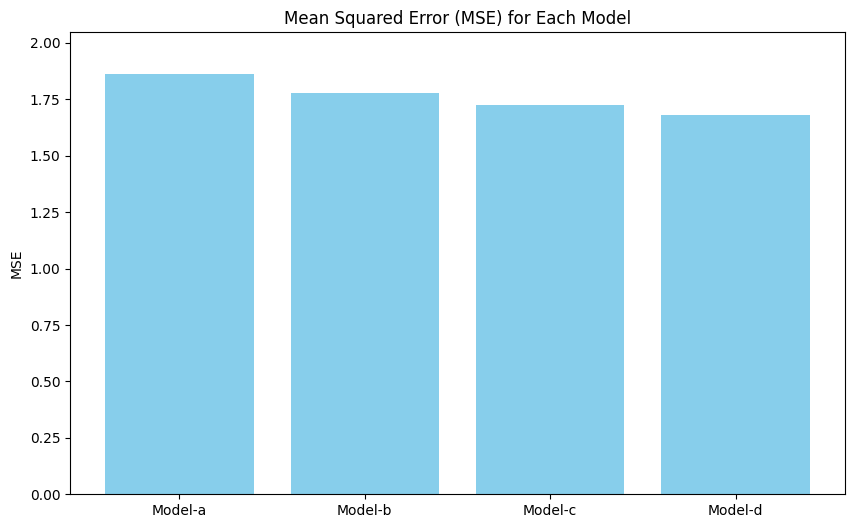

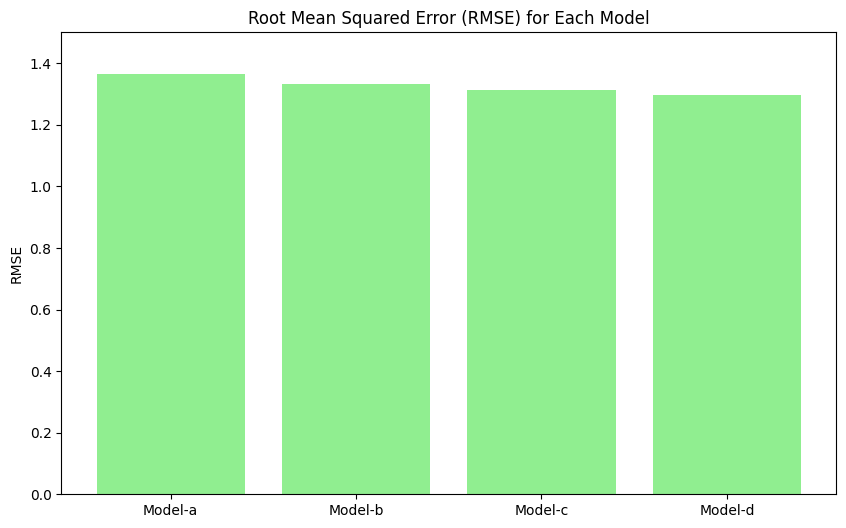


Analysis & Observations:
    Both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are commonly used for assessing and analysing
    regression model performance, with lower values indicating better performace. Model-d trained with the least correlated
    features and more training data but outerperformed the other models in both MSE and RMSE, followed by Model-c, Model-b
    and Model-a. This result suggests that blindly selecting the most correlated features or using more training data may not
    always lead to optimal performance. Potential reasons for Model-d's superior performance may include the avoidance of overfitting and the ability to capture more
    patterns in the data despite using less correlated features. 
      
    These results emphasize the importance of careful consideration of factors such as feature selection and the size of the training data when contructing proficient
    regression models. They highlight the importance of gaining a deeper und

In [47]:
# Define model names and their corresponding MSE and RMSE values
models = ['Model-a', 'Model-b', 'Model-c', 'Model-d']
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

#I've used bar plots to compare the MSE and RMSE values for each model
# Plot MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Each Model')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) * 1.1)  
plt.show()

# Plot RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='lightgreen')
plt.title('Root Mean Squared Error (RMSE) for Each Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.1) 
plt.show()

print("""
Analysis & Observations:
    Both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are commonly used for assessing and analysing
    regression model performance, with lower values indicating better performace. Model-d trained with the least correlated
    features and more training data but outerperformed the other models in both MSE and RMSE, followed by Model-c, Model-b
    and Model-a. This result suggests that blindly selecting the most correlated features or using more training data may not
    always lead to optimal performance. Potential reasons for Model-d's superior performance may include the avoidance of overfitting and the ability to capture more
    patterns in the data despite using less correlated features. 
      
    These results emphasize the importance of careful consideration of factors such as feature selection and the size of the training data when contructing proficient
    regression models. They highlight the importance of gaining a deeper understanding of the data's characteristics to achieve optimal performance. 

""")




### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


In [43]:
print("""
One ethical concern stemming from the infographic provided is the potential reinforcement of biased narratives around national achievement, as discussed in the
"Ethics and Ethical Data Visualisation" article. By prominently displaying medal counts sorted by total and gold medals, the infographic may inadvertently 
perpetuate a simplistic and competitive narrative of success based solely on medal talies. This approach fails to consider the broader context of each country's participation,
such as their investment in sports infrastructure, population size, and socio-economic factors. As a result, there is risk of distorting perceptions regarding national performance and 
perpetuating stereotypes regarding athletic superiority. This echoes concerns related to the improper use of visual elements that induce bias or stereotype. 
      
Additionaly, the infographic's exclusion of contextual details, such as the historical performance patterns or the variety of Olympic sports, could contribute to a deceptive potrayal of
success, aligning with the ethical principle of clarity and honesty as discussed in Cipan's article. 
      
Therefore, although the infographic may appear unbiased at first glance, its selective presentation of data and absence of thorough context prompt ethical reflections concerning transparency,
fairness, and inclusivity in data visualisation.


""")


One ethical concern stemming from the infographic provided is the potential reinforcement of biased narratives around national achievement, as discussed in the
"Ethics and Ethical Data Visualisation" article. By prominently displaying medal counts sorted by total and gold medals, the infographic may inadvertently 
perpetuate a simplistic and competitive narrative of success based solely on medal talies. This approach fails to consider the broader context of each country's participation,
such as their investment in sports infrastructure, population size, and socio-economic factors. As a result, there is risk of distorting perceptions regarding national performance and 
perpetuating stereotypes regarding athletic superiority. This echoes concerns related to the improper use of visual elements that induce bias or stereotype. 
      
Additionaly, the infographic's exclusion of contextual details, such as the historical performance patterns or the variety of Olympic sports, could contribut

In [39]:
print("""
Student: Prathamesh Tarde
SID: 45946000
Unit: COMP2200 | Data Science""")


Student: Prathamesh Tarde
SID: 45946000
Unit: COMP2200 | Data Science
